In [1]:
import networkx as nx
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt

import pickle as pkl

%load_ext autoreload
%autoreload 2

SEED = 181731

In [6]:
def plotRegrets(allRegrets, titles=None, save_fig=None,legend = True):
    """
    param allRegrets: list of dictionaries of regrets(samples, time_steps) for various algorithms and runs
    """
    nPlots = len(allRegrets)
    
    plt.style.use('seaborn-whitegrid')
    # sns.set()
    
    labels = {'greedy': 'Local $\epsilon$-greedy', 'thompson': 'Local TS', 'UCB': 'Local UCB','Q_learning': 'Q-learning',\
              'Our Algorithm':'Our Algorithm','UCRL2':'UCRL2'}
    styles = {'greedy': 'dashed', 'thompson': 'dashed', 'UCB': 'dashed','Q_learning': 'dotted',\
              'Our Algorithm':'solid','UCRL2':'dotted'}
    colors = {'greedy': 'b', 'thompson': 'r', 'UCB': 'g','Q_learning': 'r',\
              'Our Algorithm':'k','UCRL2':'brown'}
    keys = allRegrets[0].keys()
    

    lw = 8

    if nPlots == 1:
        regrets = allRegrets[0]
        for i, key in enumerate(keys):
            regret = regrets[key]
            regret = np.cumsum(regret, axis=1)
            # regret = np.mean(regret, axis=0)
            if key in ['Our Algorithm']:
              
                sd = np.std(regret,axis=0)
                regret = np.mean(regret,axis=0)


                plt.errorbar(range(1,len(regret)+1), regret ,sd,errorevery=int(len(regret)/6),\
                             c=colors[key], linestyle = styles[key], label=labels[key],linewidth=lw,\
                            capsize=5,elinewidth=3)
            
            else:
                regret = np.mean(regret,axis=0)
                plt.plot([i for i in range(1,len(regret)+1)],regret, c=colors[key], linestyle = styles[key], label=labels[key],\
                        linewidth=lw)
            
        if titles is not None:    
            plt.title(titles[0])
 
    if legend:
        plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.3), fontsize=18)
        
    plt.xlabel('$t$', fontsize=25)
    plt.ylabel('Regret', fontsize=25,fontweight='bold')
    plt.tick_params(labelsize=25)
    if save_fig is not None:
        plt.savefig('Figures/'+save_fig, bbox_inches = 'tight')
    plt.show()

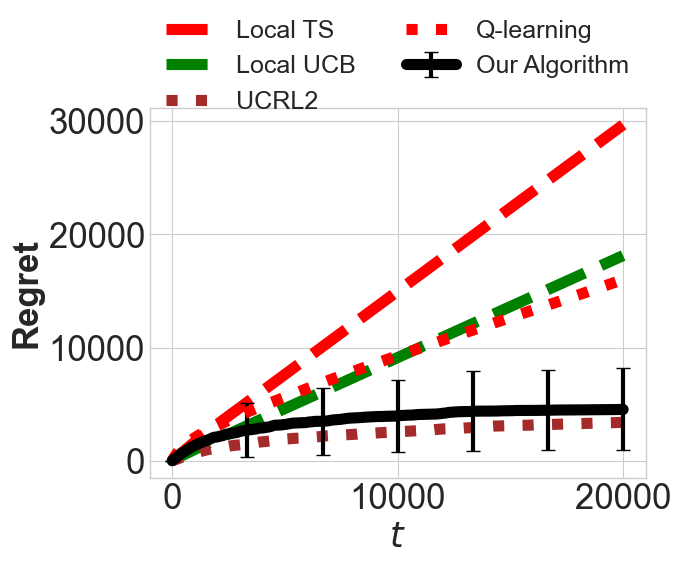

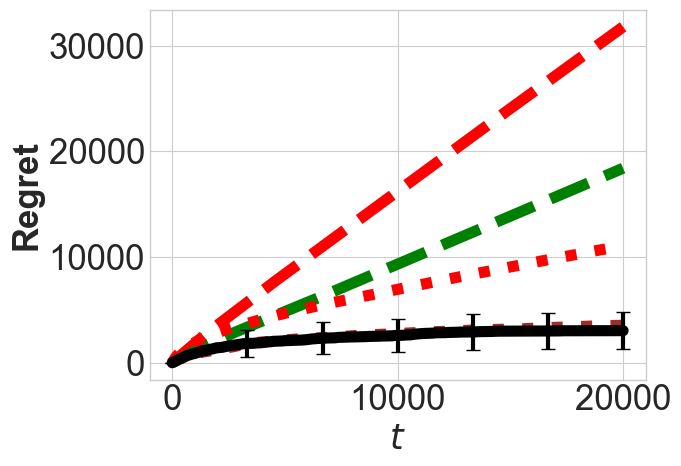

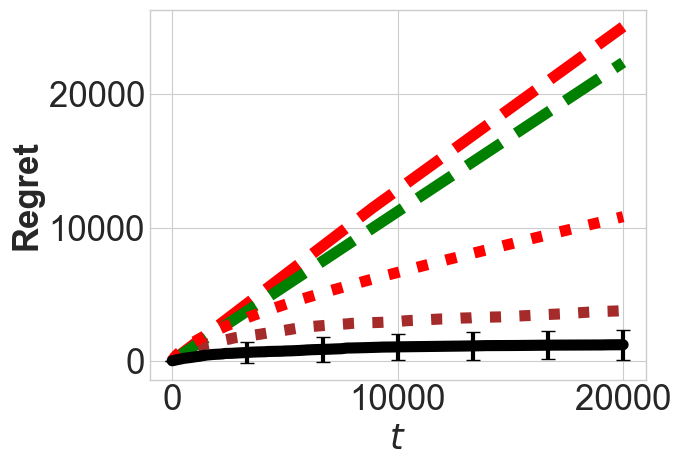

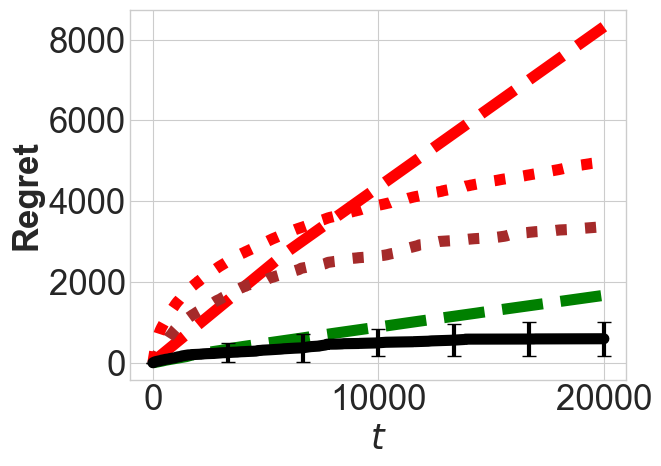

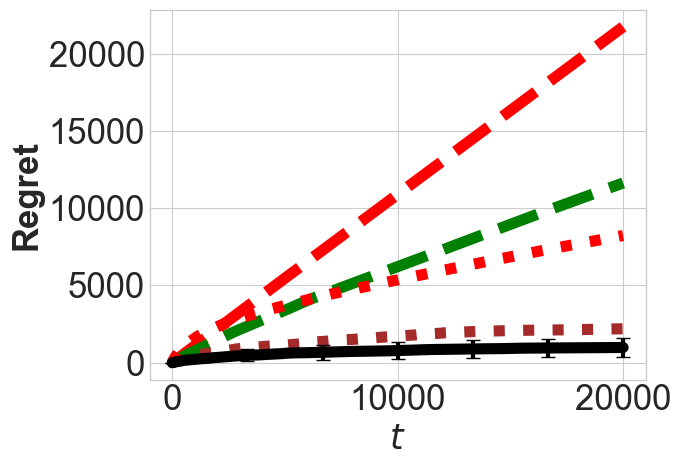

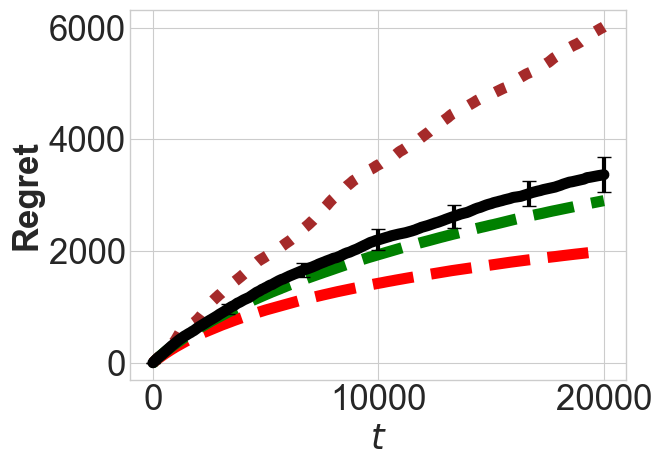

In [7]:
graphs = ['line','circle','tree', 'star', 'grid','fully_connected']
legend = {g:False for g in graphs}
legend['line']= True

for g in graphs:
    
    # try:
    with open('Data/{}_large.pkl'.format(g), 'rb') as file:
        data = pkl.load(file)

    plt.figure(dpi=100)
    plotRegrets([data], [''],'{}.png'.format(g),legend=legend[g])
    # except:
    #     pass